# <font color='red'> Analisando dados da Covid-19</font> 
---

## Importando Bibliotecas de Analise

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Visualisando Base

O repositorio da COVID -19 usado é fornecido pelo **Center for Systems Science and Engineering (CSSE) at Johns Hopkins University**   
no seguinte site é possivel ver as fontes do repositorio: <https://github.com/CSSEGISandData/COVID-19>

#### Casos Confirmados

In [6]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740


#### Mortes

In [14]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

#### Recuperados

In [15]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### Paises/Regiões Afetadas

In [46]:
last_date = '5/9/21'

In [10]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [11]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740


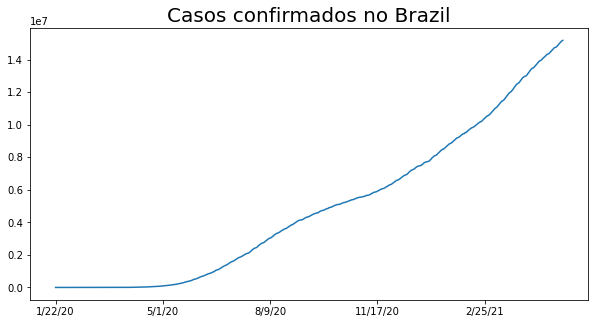

In [34]:
plt.figure(figsize=(10,5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.title("Casos confirmados no Brazil", fontsize=20)
plt.show()

<AxesSubplot:title={'center':'Novos Casos Diarios no Brazil'}>

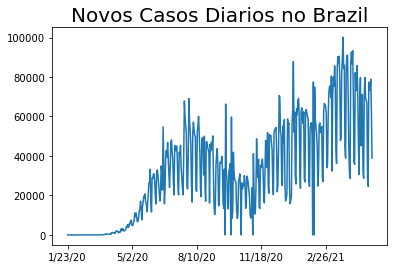

In [39]:
new_cases_brazil = confirmed_by_country.loc["Brazil"][2:].diff().dropna()
plt.title("Novos Casos Diarios no Brazil", fontsize=20)
new_cases_brazil.plot()

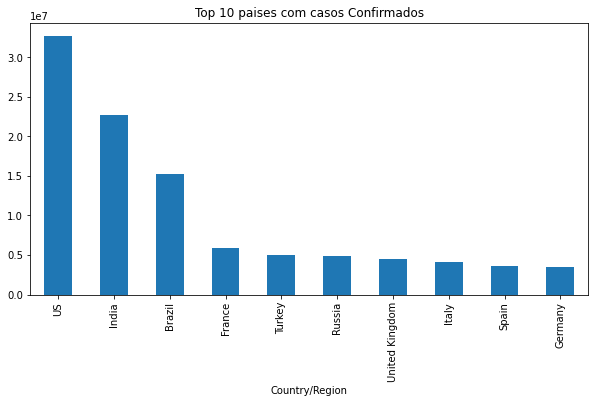

In [50]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title("Top 10 paises com casos Confirmados")
plt.show()

## Concatenando as Bases

In [52]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,61842,2686,54222
Albania,131723,2412,117089
Algeria,124104,3328,86420
Andorra,13423,127,12995
Angola,28740,633,24717


## Taxa de letalidade

Como durante uma pandemia, as informações sobre os casos é ainda muito variavel, vamos assumir um cauculo simples para pensar em Taxa de Letalidade:    
**Taxa de Letalidade** = Mortes/Confirmados

In [71]:
def latest_by_country(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

display(latest_by_country(confirmed).head())
display(latest_by_country(deaths).head())
display(latest_by_country(recovered).head())

Country/Region
Afghanistan     61842
Albania        131723
Algeria        124104
Andorra         13423
Angola          28740
Name: 5/9/21, dtype: int64

Country/Region
Afghanistan    2686
Albania        2412
Algeria        3328
Andorra         127
Angola          633
Name: 5/9/21, dtype: int64

Country/Region
Afghanistan     54222
Albania        117089
Algeria         86420
Andorra         12995
Angola          24717
Name: 5/9/21, dtype: int64

In [78]:
sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.0797875183328647
3.3717550585679774


### Letalidade por Pais

In [79]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
letality_rate_2 = combined["deaths"] / (combined["deaths"] + combined["recovered"])*100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2
combined.head()

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,61842,2686,54222,4.343327,4.719899
Albania,131723,2412,117089,1.831115,2.018393
Algeria,124104,3328,86420,2.681622,3.708161
Andorra,13423,127,12995,0.946137,0.967840
Angola,28740,633,24717,2.202505,2.497041


In [80]:
combined.sort_values('letality_rate_1', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,6482,1271,2992,19.608146,29.814684
Mexico,2365792,218985,1886233,9.256308,10.402011
Syria,23379,1657,18737,7.087557,8.124939
Sudan,34461,2365,27247,6.862830,7.986627
Egypt,237410,13904,176763,5.856535,7.292295
Somalia,14415,747,6191,5.182102,10.766792
Ecuador,400296,19222,342878,4.801947,5.308478


### Visualisando Graficamente

<AxesSubplot:xlabel='confirmed', ylabel='letality_rate_1'>

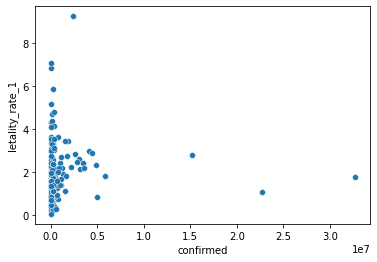

In [91]:
sns.scatterplot(data = combined.query("confirmed > 10000"), x="confirmed", y="letality_rate_1")

C:\Users\brunn\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='letality_rate_1'>

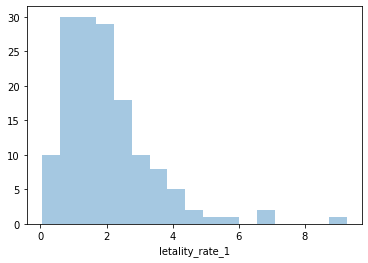

In [92]:
sns.distplot(combined.query("confirmed > 10000")["letality_rate_1"], kde=False)

In [93]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 10000").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Mexico,2365792,218985,1886233,9.256308,10.402011
Syria,23379,1657,18737,7.087557,8.124939
Sudan,34461,2365,27247,6.862830,7.986627
Egypt,237410,13904,176763,5.856535,7.292295
Somalia,14415,747,6191,5.182102,10.766792
Ecuador,400296,19222,342878,4.801947,5.308478
China,102625,4846,97377,4.722046,4.740616
Bosnia and Herzegovina,200693,8790,164717,4.379824,5.066078
Afghanistan,61842,2686,54222,4.343327,4.719899


In [95]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, last_date), latest_by_country_at(deaths, last_date), latest_by_country_at(recovered, last_date)]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc["Brazil"]
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.781335797202332
3.0428523877248423


In [98]:
informations = [latest_by_country_at(confirmed, '4/27/21'), latest_by_country_at(deaths, '5/9/20'), latest_by_country_at(recovered, '5/9/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["Brazil"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

0.07378702706902293


confirmed    14441563
deaths          10656
recovered       61685
Name: Brazil, dtype: int64

# Cruzando Fontes de dados

## Comparando Brasil com o resto do mundo

In [101]:
is_brazil = confirmed['Country/Region'] == "Brazil"
confirmed['is_brazil'] = is_brazil

<AxesSubplot:xlabel='is_brazil'>

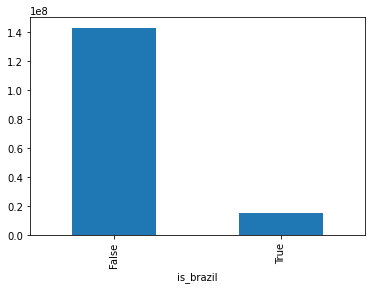

In [103]:
confirmed.groupby('is_brazil').sum()['5/9/21'].plot( kind= 'bar')

In [106]:
confirmed['is_brazil_label'] = np.where(confirmed['is_brazil'],'Brasil', 'Outros')

### Casos confirmados

Text(0.5, 1.0, 'Casos confirmados em 5/9/21')

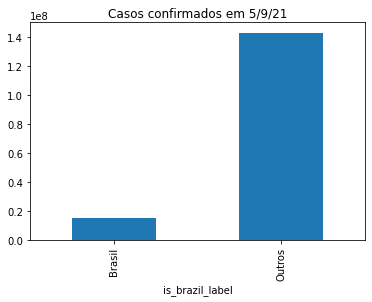

In [108]:
confirmed.groupby('is_brazil_label').sum()['5/9/21'].plot( kind= 'bar')
plt.title(f"Casos confirmados em {last_date}")
plt.show()

### Novos Casos

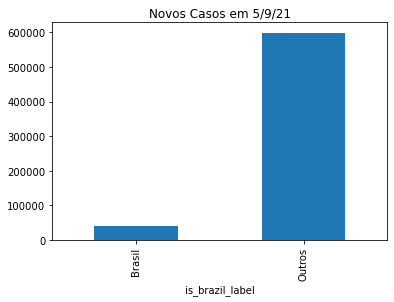

In [116]:
summed = confirmed.groupby('is_brazil_label').sum()
summed['delta'] = summed[str(last_date)]-summed['5/8/21']
summed['delta'].plot( kind= 'bar')
plt.title(f"Novos Casos em {last_date}")
plt.show()

### Progreção de Casos

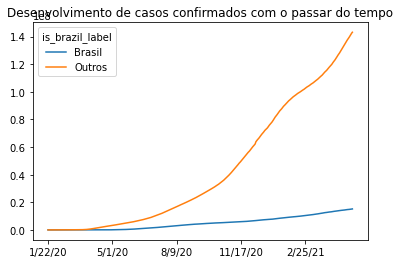

In [117]:
summed.T[2:-2].plot()
plt.title("Desenvolvimento de casos confirmados com o passar do tempo")
plt.show()

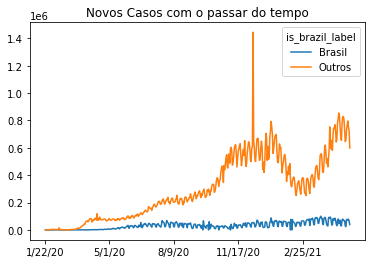

In [118]:
differences = summed.T[2:-2].diff()
differences.plot()
plt.title("Novos Casos com o passar do tempo")
plt.show()
